#### Analysis of collected data from models in production

* The path to the output data in the blob follows this syntax:

In [ ]:
# /modeldata/<subscriptionid>/<resourcegroup>/<workspace>/<webservice>/<model>/<version>/<designation>/<year>/<month>/<day>/data.csv

In [1]:
import os, uuid
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__

print("Azure Blob Storage v" + __version__ )


Azure Blob Storage v12.9.0


In [2]:
connect_str="DefaultEndpointsProtocol=https;AccountName=doughnutstorage920a5aaf5;AccountKey=XZv2F/K4GavgmL8aupt52MkeSyywBTblM2tbHrTde/qycbT4WwcMOr2/2zFDM5idYU7BhuaXkR1hfGpjwXwhPQ==;EndpointSuffix=core.windows.net" 

In [3]:
# Create the BlobServiceClient object 

blob_service_client = BlobServiceClient.from_connection_string(connect_str)

for containers in blob_service_client.list_containers():
    print(containers)

{'name': 'aml-environment-image-build', 'last_modified': datetime.datetime(2022, 1, 3, 3, 19, 15, tzinfo=datetime.timezone.utc), 'etag': '"0x8D9CE67D27F4669"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': None, 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fe0a3666d10>, 'immutable_storage_with_versioning_enabled': False}
{'name': 'azureml', 'last_modified': datetime.datetime(2022, 1, 3, 2, 53, 31, tzinfo=datetime.timezone.utc), 'etag': '"0x8D9CE643A3F8D78"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': None, 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fe0a3666b50>, 'immutable_storage_with_versioning

In [4]:
# Get the container

container_client = blob_service_client.get_container_client("modeldata")
for blobs in container_client.list_blobs():
    print(blobs)

{'name': 'b1997ed0-2373-4622-83fc-102035f13ae5/doughnut-detection/doughnut-detection-ws/donut-detection-svc-20d6/doughnut_detection_model/1/predictions/2022/01/03/predictions.csv', 'container': 'modeldata', 'snapshot': None, 'version_id': None, 'is_current_version': None, 'blob_type': <BlobType.BlockBlob: 'BlockBlob'>, 'metadata': {}, 'encrypted_metadata': None, 'last_modified': datetime.datetime(2022, 1, 3, 14, 25, 2, tzinfo=datetime.timezone.utc), 'etag': '0x8D9CEC4D4884228', 'size': 113359150, 'content_range': None, 'append_blob_committed_block_count': None, 'is_append_blob_sealed': None, 'page_blob_sequence_number': None, 'server_encrypted': True, 'copy': {'id': None, 'source': None, 'status': None, 'progress': None, 'completion_time': None, 'status_description': None, 'incremental_copy': None, 'destination_snapshot': None}, 'content_settings': {'content_type': 'application/octet-stream', 'content_encoding': None, 'content_language': None, 'content_md5': None, 'content_disposition'

In [5]:
# Create a blob client 

container_name = 'modeldata'
blob_name = 'b1997ed0-2373-4622-83fc-102035f13ae5/doughnut-detection/doughnut-detection-ws/donut-detection-svc-20d6/doughnut_detection_model/1/predictions/2022/01/03/predictions.csv'
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

In [6]:
# create a directory

if not os.path.exists('collected-data'):
    os.makedirs('collected-data')

In [7]:
# Download the blob to a local file

local_path = './collected-data'

download_file_path = os.path.join(local_path, blob_name.split('/')[-1])
print("\nDownloading blob to \n\t" + download_file_path)

with open(download_file_path, "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())


	./collected-data/predictions.csv


In [8]:
import pandas as pd
data = pd.read_csv("./collected-data/predictions.csv")

In [9]:
data

input  \
0   [[[124, 96, 56], [127, 99, 60], [120, 92, 54],...   
1   [[[19, 24, 53], [16, 21, 51], [12, 17, 49], [1...   
2   [[[19, 24, 53], [16, 21, 51], [12, 17, 49], [1...   
3   [[[0, 12, 37], [1, 12, 32], [1, 11, 30], [2, 1...   
4   [[[19, 24, 53], [16, 21, 51], [12, 17, 49], [1...   
5   [[[4, 5, 7], [3, 4, 6], [2, 3, 5], [1, 2, 4], ...   
6   [[[58, 65, 88], [74, 82, 104], [81, 89, 111], ...   
7   [[[19, 24, 53], [16, 21, 51], [12, 17, 49], [1...   
8   [[[196, 214, 220], [206, 225, 231], [211, 231,...   
9   [[[178, 201, 219], [179, 201, 221], [179, 201,...   
10  [[[148, 122, 87], [150, 121, 87], [151, 122, 8...   
11  [[[29, 30, 34], [30, 31, 35], [29, 30, 34], [2...   
12  [[[180, 114, 41], [187, 121, 47], [195, 127, 5...   
13  [[[0, 3, 2], [1, 3, 2], [3, 3, 3], [3, 3, 2], ...   
14  [[[70, 57, 48], [69, 55, 46], [72, 55, 47], [6...   
15  [[[178, 170, 159], [178, 170, 159], [178, 170,...   
16  [[[96, 78, 71], [76, 61, 53], [77, 66, 52], [7...   
17  [[[124, 93, 64], [123, 92, 63], [125, 94, 65],...   
18  [[[8, 11, 38], [9, 12, 40], [11, 14, 43], [8, ...   
19  [[[237, 101, 157], [249, 197, 227], [250, 185,...   
20  [[[237, 101, 157], [249, 197, 227], [250, 185,...   
21  [[[22, 20, 33], [23, 21, 33], [22, 21, 30], [2...   
22  [[[0, 12, 37], [1, 12, 32], [1, 11, 30], [2, 1...   

                                               output  \
0   [[[124, 96, 56], [127, 99, 60], [120, 92, 54],...   
1   [[[19, 24, 53], [16, 21, 51], [12, 17, 49], [1...   
2   [[[19, 24, 53], [16, 21, 51], [12, 17, 49], [1...   
3   [[[0, 12, 37], [1, 12, 32], [1, 11, 30], [2, 1...   
4   [[[19, 24, 53], [16, 21, 51], [12, 17, 49], [1...   
5   [[[4, 5, 7], [3, 4, 6], [2, 3, 5], [1, 2, 4], ...   
6   [[[58, 65, 88], [74, 82, 104], [81, 89, 111], ...   
7   [[[19, 24, 53], [16, 21, 51], [12, 17, 49], [1...   
8   [[[196, 214, 220], [206, 225, 231], [211, 231,...   
9   [[[178, 201, 219], [179, 201, 221], [179, 201,...   
10  [[[148, 122, 87], [150, 121, 87], [151, 122, 8...   
11  [[[29, 30, 34], [30, 31, 35], [29, 30, 34], [2...   
12  [[[180, 114, 41], [187, 121, 47], [195, 127, 5...   
13  [[[0, 3, 2], [1, 3, 2], [3, 3, 3], [3, 3, 2], ...   
14  [[[70, 57, 48], [69, 55, 46], [72, 55, 47], [6...   
15  [[[178, 170, 159], [178, 170, 159], [178, 170,...   
16  [[[96, 78, 71], [76, 61, 53], [77, 66, 52], [7...   
17  [[[124, 93, 64], [123, 92, 63], [125, 94, 65],...   
18  [[[8, 11, 38], [9, 12, 40], [11, 14, 43], [8, ...   
19  [[[237, 101, 157], [249, 197, 227], [250, 185,...   
20  [[[237, 101, 157], [249, 197, 227], [250, 185,...   
21  [[[22, 20, 33], [23, 21, 33], [22, 21, 30], [2...   
22  [[[0, 12, 37], [1, 12, 32], [1, 11, 30], [2, 1...   

                                                count  
0   {'Strawberry Frosted': 1, 'Chocolate Frosted':...  
1   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
2   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
3   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
4   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
5   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
6   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
7   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
8   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
9   {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
10  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
11  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
12  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
13  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
14  {'Strawberry Frosted': 1, 'Chocolate Frosted':...  
15  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
16  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
17  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
18  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
19  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
20  {'Strawberry Frosted': 0, 'Chocolate Frosted':...  
21  {'Strawberry Frosted': 2, 'Chocolate Frosted':...  
22  {'Strawberry Frost

/home/bhavya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


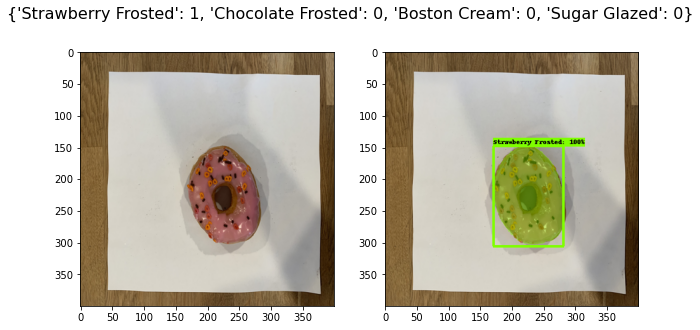

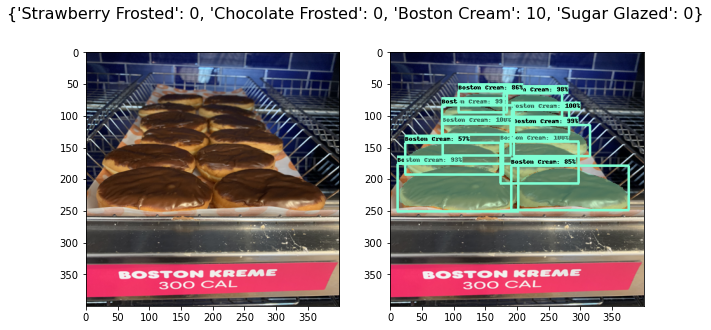

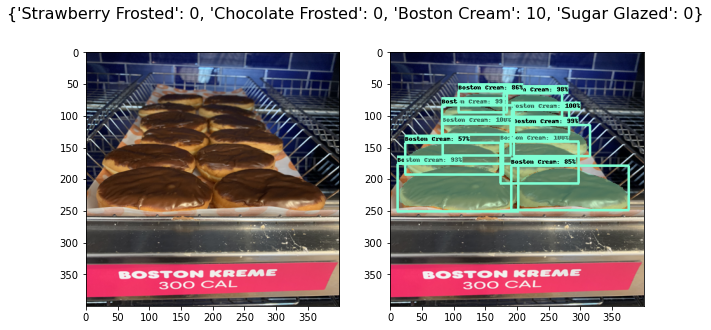

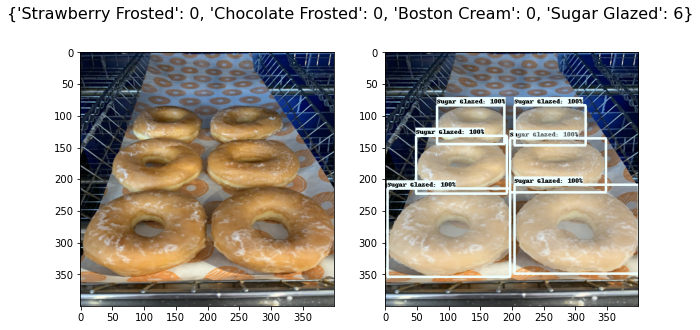

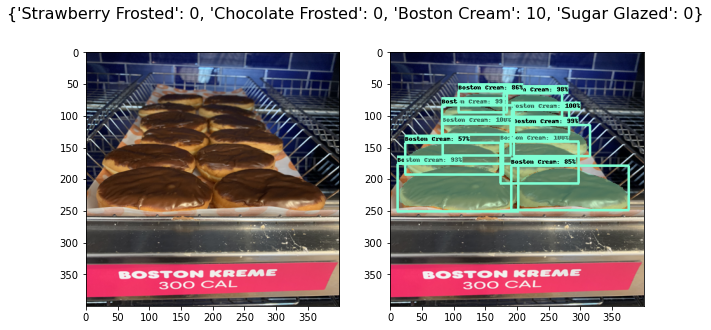

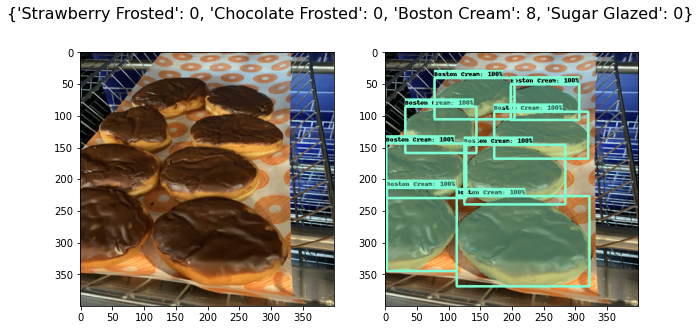

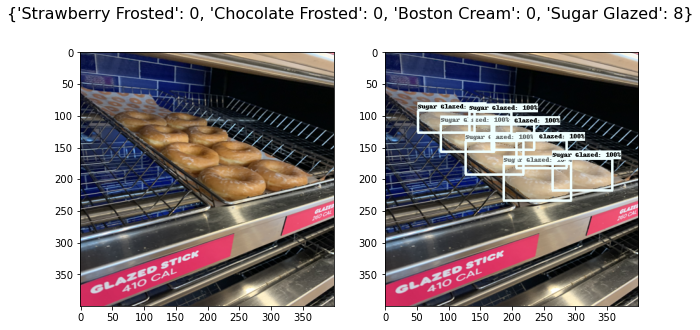

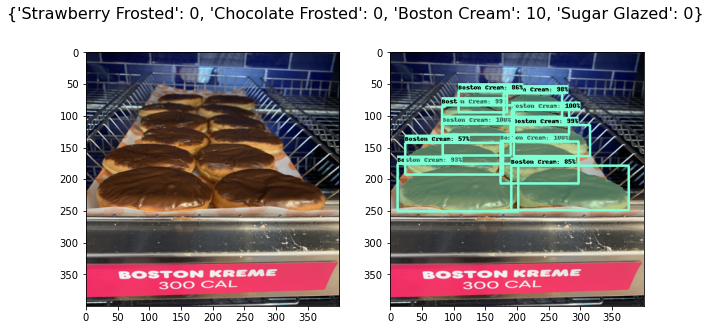

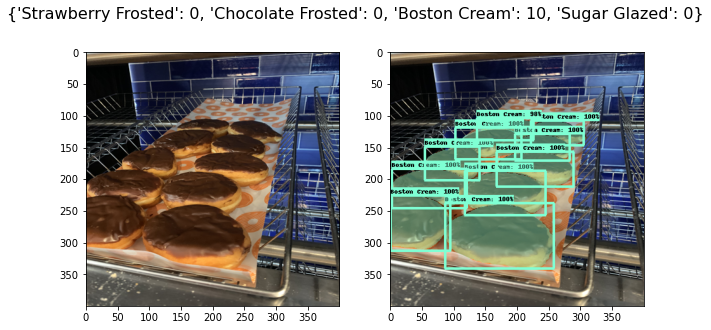

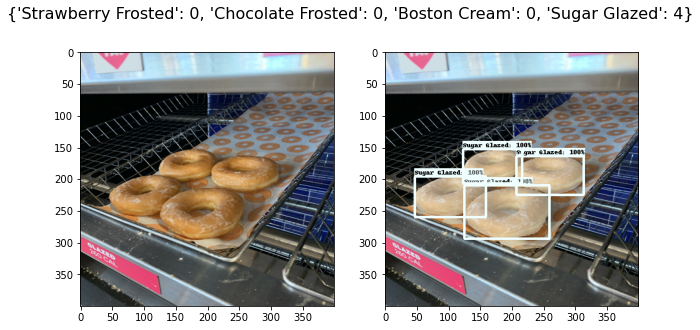

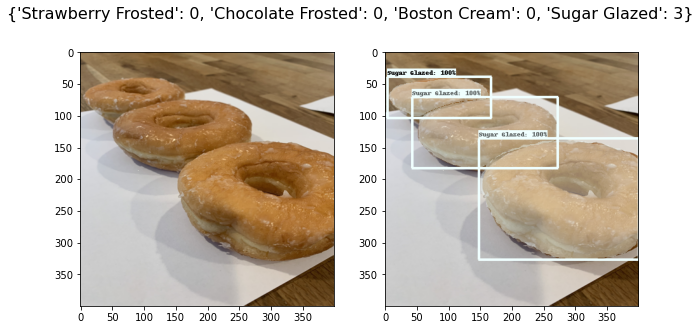

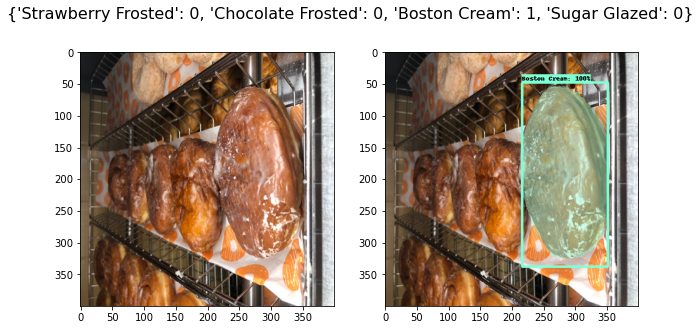

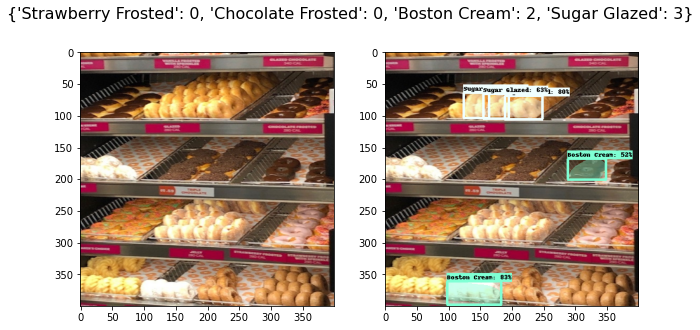

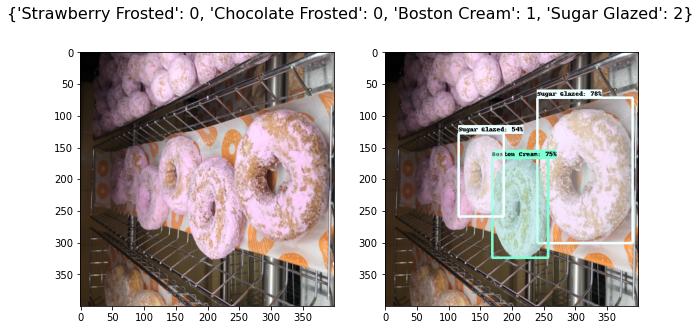

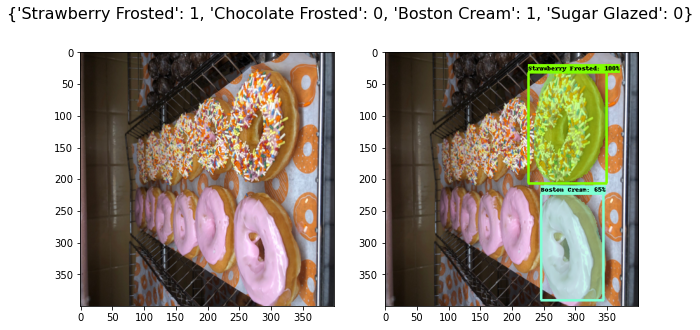

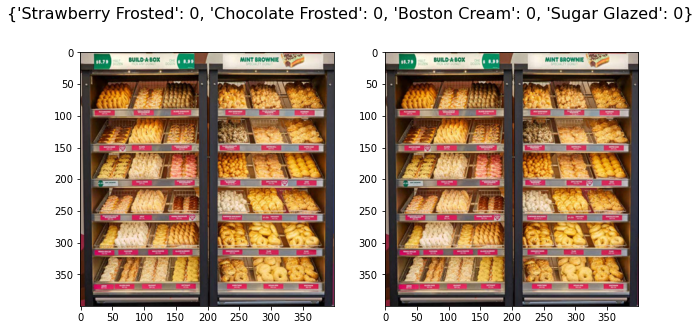

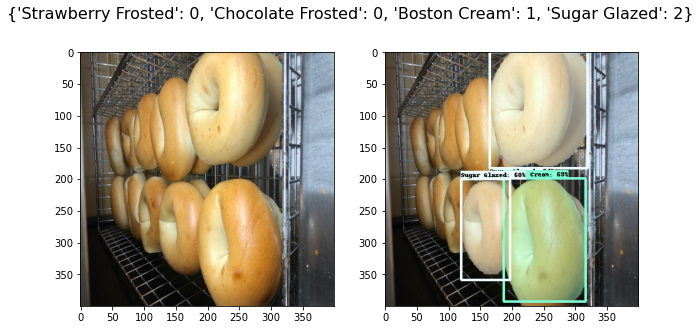

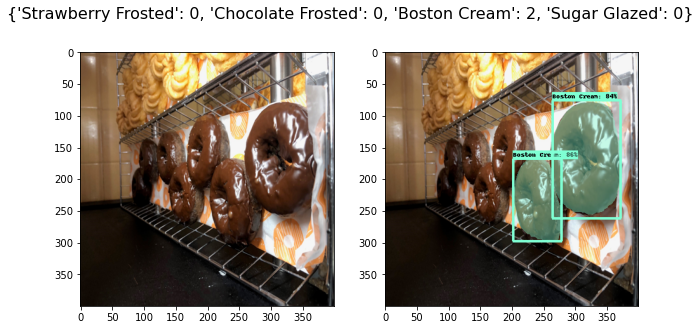

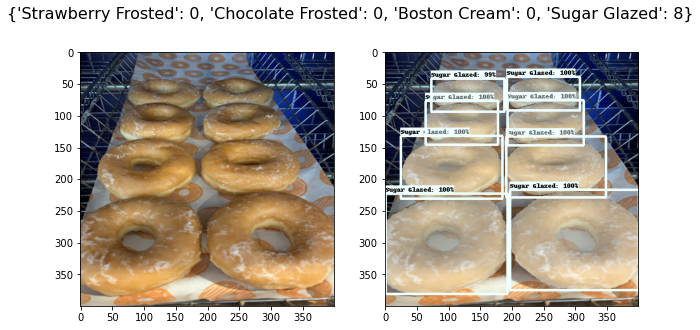

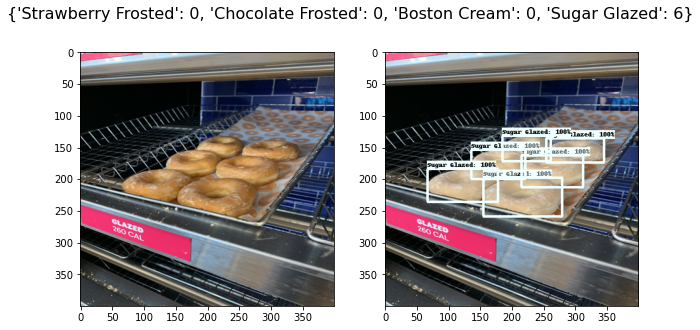

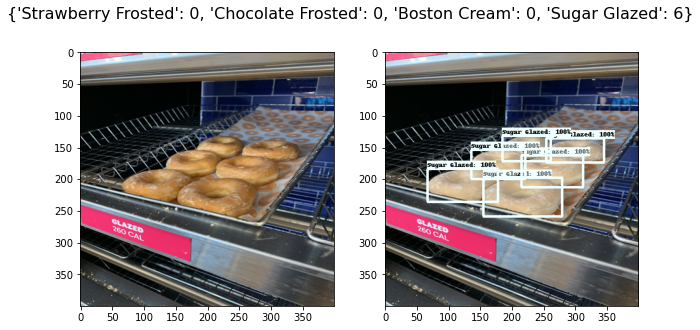

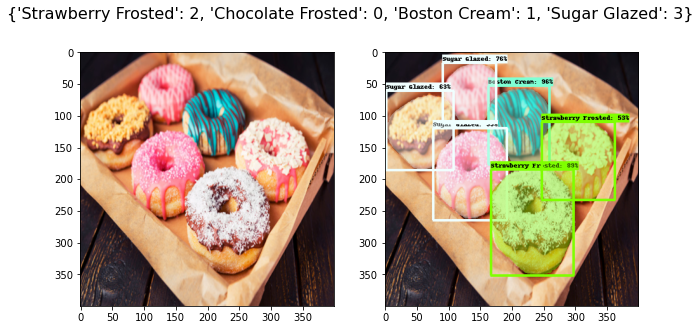

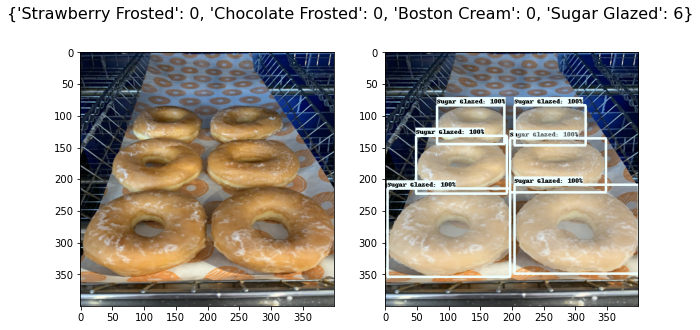

In [108]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import json


for i, row in data.iterrows():
    input_img = np.array(json.loads(row['input']), dtype=np.uint8)
    output_img = np.array(json.loads(row['output']), dtype=np.uint8)
    count = row['count']
    fig, axs = plt.subplots(1, 2, figsize=(10,5))    
    fig.suptitle(str(count), fontsize=16)
    axs[0].imshow(input_img)
    axs[1].imshow(output_img)
    
plt.show()